In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

In [2]:
def compare_pe_spectrum(area1,area2,area3=None,area4=None,area5=None, bins = 200,
                        volts = (7,8,9,10,11), ledv = 3, low = 0, high = 100):
    area_space = np.linspace(low,high, bins)
    h1, t1 = np.histogram(area1, bins=area_space)
    h2, t2 = np.histogram(area2, bins=area_space)
    plt.figure(figsize=(8,4.5))
    a1 = plt.hist(area1,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[0]} kV')
    a2 = plt.hist(area2,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[1]} kV')
    if area3 is not None:
        h3, t3 = np.histogram(area3, bins=area_space)
        a3 = plt.hist(area3,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[2]} kV')
    if area4 is not None:
        h4, t4 = np.histogram(area4, bins=area_space)
        a4 = plt.hist(area4,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[3]} kV')
    if area5 is not None:
        h5, t5 = np.histogram(area5, bins=area_space)
        a5 = plt.hist(area5,bins=area_space,histtype='step',lw=2,label=f'ABALONE at {volts[4]} kV')
    #plt.title(f'PE spectrum comparison - LED at {ledv:.1f} V',size=14)
    plt.xlabel('area (ADC x $\mu$s)',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)
    plt.legend()
    plt.savefig('plots/1SPE.png',dpi=800)

In [3]:
df_7 = pd.read_hdf('processed_data/data_ABALONE_7kV_SiPM2_32V_LED_3V.h5')
df_8 = pd.read_hdf('processed_data/data_ABALONE_8kV_SiPM2_32V_LED_3V.h5')
df_9 = pd.read_hdf('processed_data/data_ABALONE_9kV_SiPM2_32V_LED_3V.h5')
df_10 = pd.read_hdf('processed_data/data_ABALONE_10kV_SiPM2_32V_LED_3V.h5')
df_11 = pd.read_hdf('processed_data/data_ABALONE_11kV_SiPM2_32V_LED_3V.h5')
df_12 = pd.read_hdf('processed_data/data_ABALONE_12kV_SiPM2_32V_LED_3V.h5')
df_13 = pd.read_hdf('processed_data/data_ABALONE_13kV_SiPM2_32V_LED_3V.h5')
df_14 = pd.read_hdf('processed_data/data_ABALONE_14kV_SiPM2_32V_LED_3V.h5')
df_15 = pd.read_hdf('processed_data/data_ABALONE_15kV_SiPM2_32V_LED_3V.h5')
df_16 = pd.read_hdf('processed_data/data_ABALONE_16kV_SiPM2_32V_LED_3V.h5')
df_17 = pd.read_hdf('processed_data/data_ABALONE_17kV_SiPM2_32V_LED_3V.h5')
df_18 = pd.read_hdf('processed_data/data_ABALONE_18kV_SiPM2_32V_LED_3V.h5')
df_19 = pd.read_hdf('processed_data/data_ABALONE_19kV_SiPM2_32V_LED_3V.h5')
df_20 = pd.read_hdf('processed_data/data_ABALONE_20kV_SiPM2_32V_LED_3V.h5')
df_21 = pd.read_hdf('processed_data/data_ABALONE_21kV_SiPM2_32V_LED_3V.h5')
df_22 = pd.read_hdf('processed_data/data_ABALONE_22kV_SiPM2_32V_LED_3V.h5')
df_23 = pd.read_hdf('processed_data/data_ABALONE_23kV_SiPM2_32V_LED_3V.h5')
df_24 = pd.read_hdf('processed_data/data_ABALONE_24kV_SiPM2_32V_LED_3V.h5')

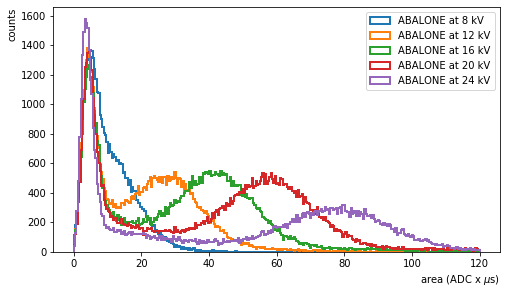

In [4]:
compare_pe_spectrum(df_8['area'],df_12['area'],df_16['area'],df_20['area'],df_24['area'],
                    volts=(8,12,16,20,24),low=0,high=120,bins=300,ledv=3)

In [5]:
df4_7 = pd.read_hdf('processed_data/data_ABALONE_7kV_SiPM2_32V_LED_4V.h5')
df4_8 = pd.read_hdf('processed_data/data_ABALONE_8kV_SiPM2_32V_LED_4V.h5')
df4_9 = pd.read_hdf('processed_data/data_ABALONE_9kV_SiPM2_32V_LED_4V.h5')
df4_10 = pd.read_hdf('processed_data/data_ABALONE_10kV_SiPM2_32V_LED_4V.h5')
df4_11 = pd.read_hdf('processed_data/data_ABALONE_11kV_SiPM2_32V_LED_4V.h5')
df4_12 = pd.read_hdf('processed_data/data_ABALONE_12kV_SiPM2_32V_LED_4V.h5')
df4_13 = pd.read_hdf('processed_data/data_ABALONE_13kV_SiPM2_32V_LED_4V.h5')
df4_14 = pd.read_hdf('processed_data/data_ABALONE_14kV_SiPM2_32V_LED_4V.h5')
df4_15 = pd.read_hdf('processed_data/data_ABALONE_15kV_SiPM2_32V_LED_4V.h5')
df4_16 = pd.read_hdf('processed_data/data_ABALONE_16kV_SiPM2_32V_LED_4V.h5')
df4_17 = pd.read_hdf('processed_data/data_ABALONE_17kV_SiPM2_32V_LED_4V.h5')
df4_18 = pd.read_hdf('processed_data/data_ABALONE_18kV_SiPM2_32V_LED_4V.h5')
df4_19 = pd.read_hdf('processed_data/data_ABALONE_19kV_SiPM2_32V_LED_4V.h5')
df4_20 = pd.read_hdf('processed_data/data_ABALONE_20kV_SiPM2_32V_LED_4V.h5')

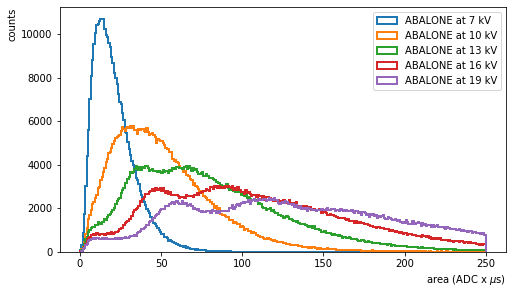

In [6]:
compare_pe_spectrum(df4_7['area'],df4_10['area'],df4_13['area'],df4_16['area'],df4_19['area'],
                    volts=(7,10,13,16,19), low=0, high=250, bins=300, ledv=4)

21.40468227424749 4.816053511705685 13.110367892976589
[3.84300000e+02 2.04482084e+01 8.30590834e+00 8.41214056e+02
 4.33297242e+00 1.59727480e+00 2.82750283e+01 1.47508140e+01
 5.63815509e-01]
nspe 7945.768046985886
nbs 39.960415987551386
20.334448160535118 5.083612040133779 12.709030100334449
[3.82500000e+02 2.34125962e+01 8.85474796e+00 7.99795813e+02
 4.41050645e+00 1.66361048e+00 3.09107240e+01 1.68800368e+01
 5.23792809e-01]
nspe 8455.030161441697
nbs 40.58435458365382
29.698996655518393 4.013377926421405 16.8561872909699
[330.34686792  28.1492928    9.96560147 882.94109325   4.13551324
   1.51771528  43.60412392  18.13438794   3.75894073]
nspe 8232.553483214453
nbs 410.84941474381725
30.769230769230766 4.280936454849498 17.52508361204013
[3.74400000e+02 3.06168798e+01 1.05715184e+01 8.48716152e+02
 4.25964089e+00 1.60236542e+00 2.77038085e+01 1.54879309e+01
 8.48684637e-01]
nspe 9902.422184627574
nbs 58.935334194226215
33.17725752508361 4.548494983277592 18.862876254180602
[369.

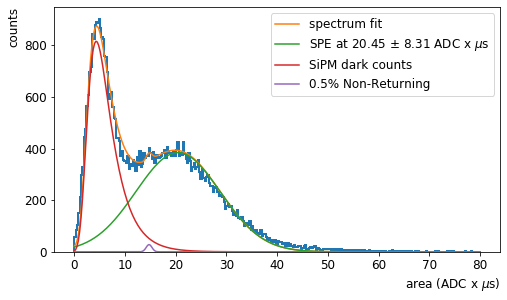

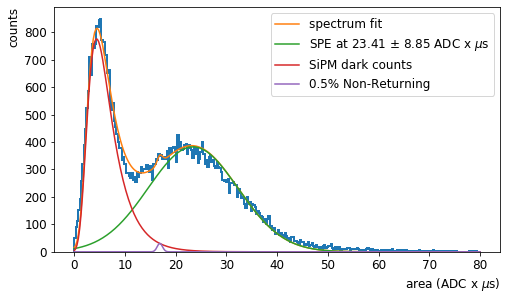

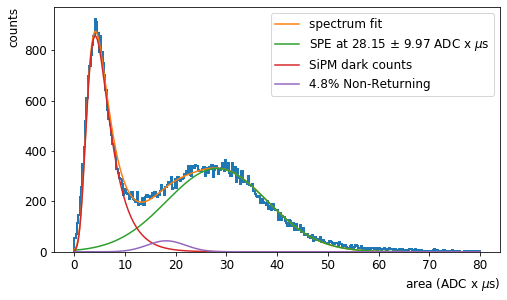

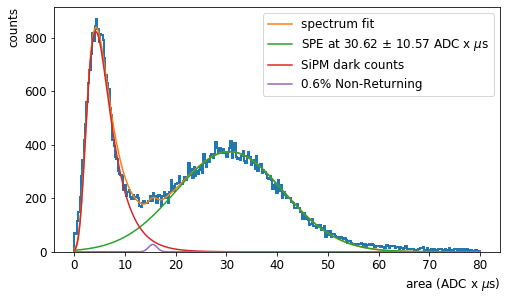

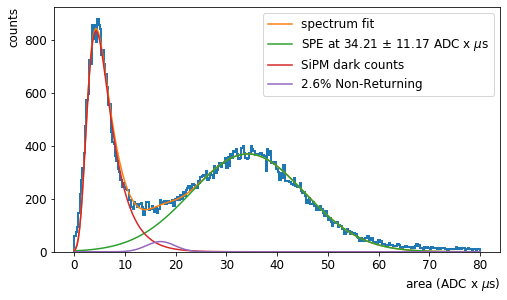

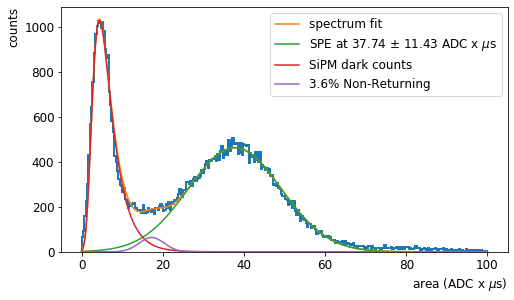

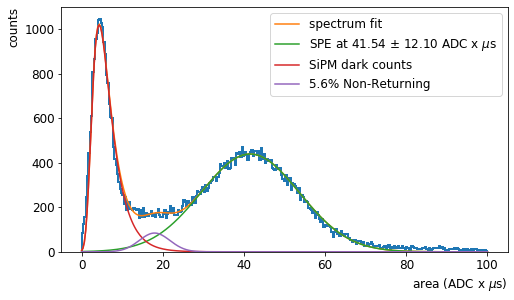

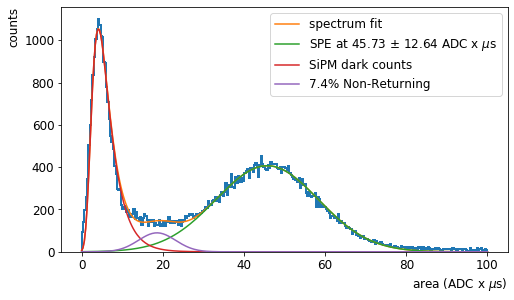

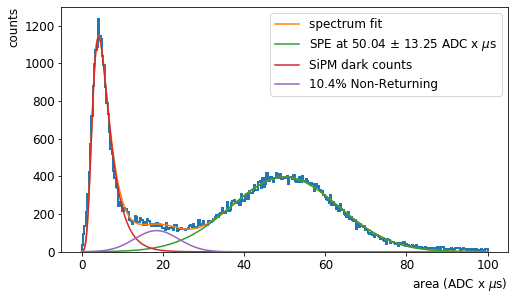

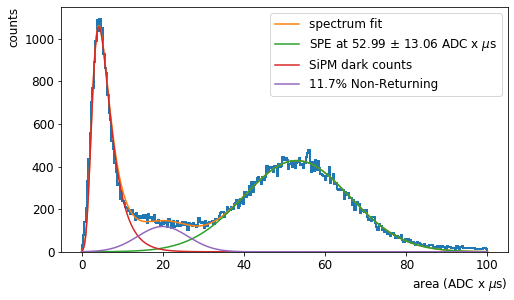

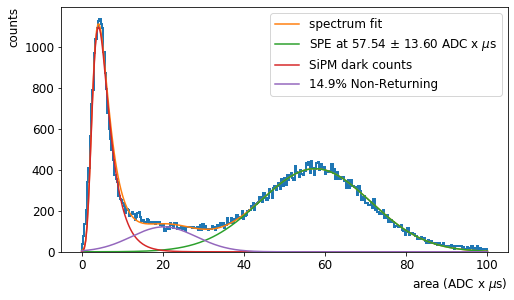

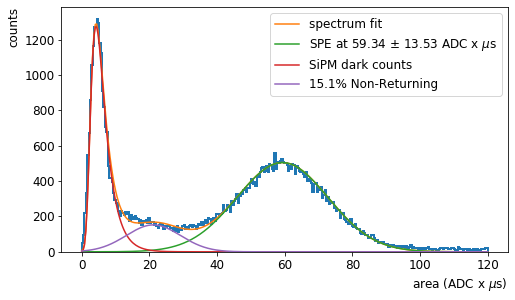

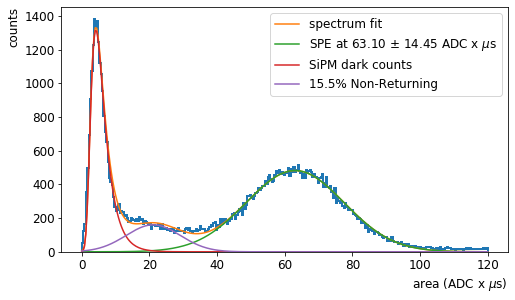

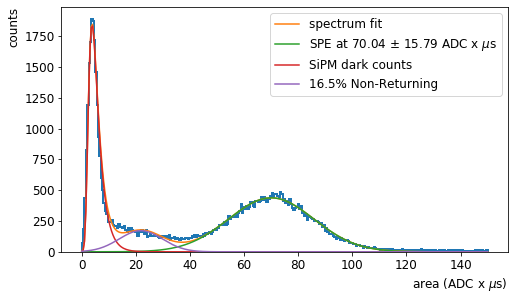

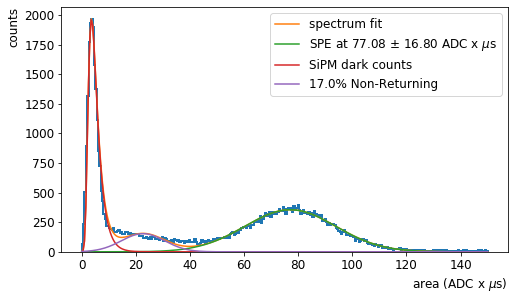

In [7]:
volts = np.arange(7,25)
spe, sig, nspe, nbs = np.zeros(len(volts)), np.zeros(len(volts)), np.zeros(len(volts)), np.zeros(len(volts))
#spe[0],sig[0],nspe[0],nbs[0] = pau.fit_spe_spectrum(df_7['area'], volts = 7, low = 0, high = 80, bins = 300)
#spe[1],sig[1],nspe[1],nbs[1] = pau.fit_spe_spectrum(df_8['area'], volts = 8, low = 0, high = 80, bins = 300)
#spe[2],sig[2],nspe[2],nbs[2] = pau.fit_spe_spectrum(df_9['area'], volts = 9, low = 0, high = 80, bins = 300)
spe[3],sig[3],nspe[3],nbs[3] = pau.fit_spe_spectrum(df_10['area'], volts = 10, low = 0, high = 80, bins = 300)
spe[4],sig[4],nspe[4],nbs[4] = pau.fit_spe_spectrum(df_11['area'], volts = 11, low = 0, high = 80, bins = 300)
spe[5],sig[5],nspe[5],nbs[5] = pau.fit_spe_spectrum(df_12['area'], volts = 12, low = 0, high = 80, bins = 300)
spe[6],sig[6],nspe[6],nbs[6] = pau.fit_spe_spectrum(df_13['area'], volts = 13, low = 0, high = 80, bins = 300)
spe[7],sig[7],nspe[7],nbs[7] = pau.fit_spe_spectrum(df_14['area'], volts = 14, low = 0, high = 80, bins = 300)
spe[8],sig[8],nspe[8],nbs[8] = pau.fit_spe_spectrum(df_15['area'], volts = 15, low = 0, high = 100, bins = 300)
spe[9],sig[9],nspe[9],nbs[9] = pau.fit_spe_spectrum(df_16['area'], volts = 16, low = 0, high = 100, bins = 300)
spe[10],sig[10],nspe[10],nbs[10] = pau.fit_spe_spectrum(df_17['area'], volts = 17, low = 0, high = 100, bins = 300)
spe[11],sig[11],nspe[11],nbs[11] = pau.fit_spe_spectrum(df_18['area'], volts = 18, low = 0, high = 100, bins = 300)
spe[12],sig[12],nspe[12],nbs[12] = pau.fit_spe_spectrum(df_19['area'], volts = 19, low = 0, high = 100, bins = 300)
spe[13],sig[13],nspe[13],nbs[13] = pau.fit_spe_spectrum(df_20['area'], volts = 20, low = 0, high = 100, bins = 300,save=1)
spe[14],sig[14],nspe[14],nbs[14] = pau.fit_spe_spectrum(df_21['area'], volts = 21, low = 0, high = 120, bins = 300)
spe[15],sig[15],nspe[15],nbs[15] = pau.fit_spe_spectrum(df_22['area'], volts = 22, low = 0, high = 120, bins = 300)
spe[16],sig[16],nspe[16],nbs[16] = pau.fit_spe_spectrum(df_23['area'], volts = 23, low = 0, high = 150, bins = 300)
spe[17],sig[17],nspe[17],nbs[17] = pau.fit_spe_spectrum(df_24['area'], volts = 24, low = 0, high = 150, bins = 300)
gain = spe/1.113

[54.1 57.4 62.4 66.9]
[54.9648258  58.36737569 61.76992557 65.17247545]


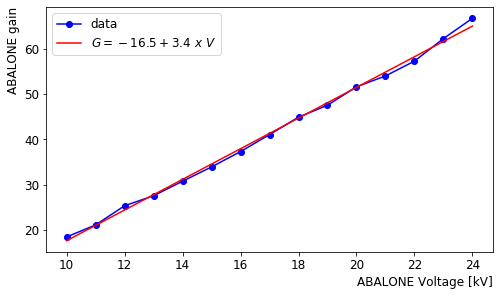

In [8]:
# ABALONE gain
def line(x, a, b):
    return a + b * x

plt.subplots(figsize=(8,4.5))
#ax.plot(volts,gain,color='r',marker='o',label='ABALONE gain')
#ax.set_xlabel('ABALONE Voltage [kV]', ha='right',x=1,fontsize=14)
#ax.set_ylabel('ABALONE gain',ha='right',y=1,color="red",fontsize=14)
#ax.tick_params(axis='y', colors='r',labelsize=14)
#ax.tick_params(axis='x',labelsize=14)
gain[-4]=54.1
gain[-3]=57.4
gain[-2]=62.4
gain[-1]=66.9
plt.plot(volts[3:],gain[3:],color='b',marker='o',label='data')
popt, pcov = curve_fit(line, volts[3:], gain[3:])
perr = np.sqrt(np.diag(pcov))
print(gain[-4:])
print(line(volts[-4:], *popt))
plt.plot(volts[3:], line(volts[3:], *popt),c='r',label=f'$G={popt[0]:.1f}+{popt[1]:.1f}~x~V$')
plt.xlabel('ABALONE Voltage [kV]', ha='right',x=1,fontsize=12)
plt.ylabel('ABALONE gain',ha='right',y=1,fontsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.tick_params(axis='x',labelsize=12)
plt.legend(fontsize=12)
plt.savefig('plots/gain.png',dpi=800)

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


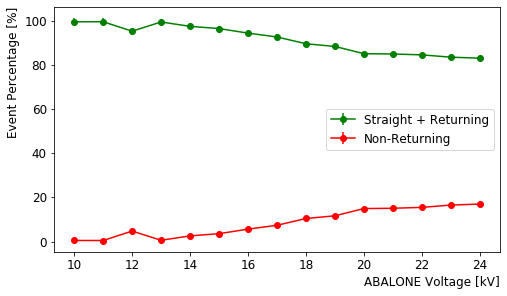

In [10]:
# event fraction
plt.subplots(figsize=(8,4.5))
#ax2 = ax.twinx()
bs = nbs/(nbs+nspe)
bse = np.sqrt( nbs/(nbs+nspe)**2 + nbs**2/(nbs+nspe)**3)
sp = nspe/(nbs+nspe)
sp_e = np.sqrt( nspe/(nbs+nspe)**2 + nspe**2/(nbs+nspe)**3)
#ax2.errorbar(volts,bs,yerr=bse,color='g',marker='o',label='NRBE')
#ax2.errorbar(volts,sp,yerr=sp_e,color='b',marker='o',label='Straight + Returning')
#ax2.set_ylabel('event percentage [%]',ha='right',y=1,color="black",fontsize=14)
#ax2.tick_params(axis='y', colors='black',labelsize=14)
plt.errorbar(volts,sp*100,yerr=sp_e*100,color='g',marker='o',label='Straight + Returning')
plt.errorbar(volts,bs*100,yerr=bse*100,color='r',marker='o',label='Non-Returning')
plt.xlabel('ABALONE Voltage [kV]',ha='right',x=1,fontsize=12)
plt.ylabel('Event Percentage [%]',ha='right',y=1,fontsize=12)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.legend(fontsize=12)
plt.savefig('plots/PercExp.png',dpi=800)